# Tensorflow Implementation

In [1]:
import nest_asyncio
nest_asyncio.apply()
import collections
import numpy as np
import tensorflow as tf
import tensorflow_federated as tff
from tqdm import tqdm
from pathlib import Path
from matplotlib import pyplot as plt
import collections
import numpy as np
from tensorflow import reshape, nest, config
from tensorflow.keras import losses, metrics, optimizers
import tensorflow_federated as tff
from matplotlib import pyplot as plt
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import reshape, nest, config
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping

# Data Loading and Pre_processing

In [2]:
experiment_name = "xray_image_dataset"
method = "tff_training"
this_dir = Path.cwd()
model_dir = this_dir / "models" 
output_dir = this_dir / "results" 

data = pd.read_csv("./../texted_data.csv")
label = pd.get_dummies(data["result"])
X = data.drop(["result", "Unnamed: 0"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    label, 
                                                    test_size=0.1, 
                                                    random_state=42)
# X_train = X_train.astype(np.float32).values
# y_train = pd.get_dummies(data["result"]).values
# X = X.astype(np.float32).values
# label = pd.get_dummies(data["result"]).values

X_test = X_test.astype(np.float32).values
y_test =  y_test.astype(np.int32).values
X_train = X_train.astype(np.float32).values
y_train =  y_train.astype(np.int32).values

# Model 1

In [3]:
model = Sequential()


model.add(Dense(64, activation= "relu", input_shape=(7,)))
# model.add(Dense(128, activation= "relu"))
model.add(Dense(128, activation= "relu"))
# model.add(Dropout(0.5))
model.add(Dense(2, activation= "softmax"))

model.compile(loss="categorical_crossentropy", optimizer = "adam",
             metrics=["accuracy"])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 9,090
Trainable params: 9,090
Non-trainable params: 0
_________________________________________________________________


In [5]:
early_stop = EarlyStopping(monitor="val_loss", patience=2) 

In [6]:

model.fit(x = X_train, y = y_train,epochs = 10,validation_split = 0.3 ,batch_size = 32, callbacks=[early_stop])

Epoch 1/10
3664/3664 [==============================] - 6s 2ms/step - loss: 0.3298 - accuracy: 0.8971 - val_loss: 0.3281 - val_accuracy: 0.8975
Epoch 2/10
3664/3664 [==============================] - 5s 1ms/step - loss: 0.3256 - accuracy: 0.8980 - val_loss: 0.3262 - val_accuracy: 0.8975
Epoch 3/10
3664/3664 [==============================] - 4s 1ms/step - loss: 0.3251 - accuracy: 0.8980 - val_loss: 0.3252 - val_accuracy: 0.8975
Epoch 4/10
3664/3664 [==============================] - 7s 2ms/step - loss: 0.3251 - accuracy: 0.8980 - val_loss: 0.3252 - val_accuracy: 0.8975
Epoch 5/10
3664/3664 [==============================] - 4s 1ms/step - loss: 0.3250 - accuracy: 0.8980 - val_loss: 0.3257 - val_accuracy: 0.8975
Epoch 6/10
3664/3664 [==============================] - 5s 1ms/step - loss: 0.3249 - accuracy: 0.8980 - val_loss: 0.3252 - val_accuracy: 0.8975
Epoch 7/10
3664/3664 [==============================] - 5s 1ms/step - loss: 0.3246 - accuracy: 0.8980 - val_loss: 0.3252 - val_accuracy:

In [7]:
model.save("Tensorflow_best_model.h5")

In [8]:
model.evaluate(x = X_test, y = y_test, batch_size = 32)

582/582 [==============================] - 0s 758us/step - loss: 0.3251 - accuracy: 0.8977


[0.325103223323822, 0.8976839184761047]

In [9]:
model.metrics_names

['loss', 'accuracy']

In [10]:
pred = model.predict(X_test)

In [11]:
pred1 = np.argmax(pred, axis=-1)

In [12]:
test_labels = np.argmax(y_test, axis=-1)

In [13]:
print(classification_report(test_labels, pred1))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     16176
           1       0.84      0.27      0.41      2433

    accuracy                           0.90     18609
   macro avg       0.87      0.63      0.68     18609
weighted avg       0.89      0.90      0.87     18609



<AxesSubplot:>

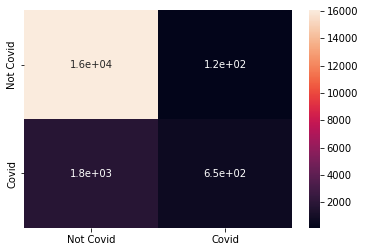

In [14]:
cm = confusion_matrix(test_labels, pred1)
sns.heatmap(cm, annot = True, xticklabels=["Not Covid", "Covid"], yticklabels=["Not Covid", "Covid"])

# Data Reduction

In [15]:
positive = data[data["result"] == 1]
negative = data[data["result"] == 0]
negative = negative[:50000]
newData = pd.concat([positive, negative], axis =0)
label = pd.get_dummies(newData["result"])
X = newData.drop(["result", "Unnamed: 0"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    label, 
                                                    test_size=0.2, 
                                                    random_state=42, shuffle = True)
# X_train = X_train.astype(np.float32).values
# y_train = pd.get_dummies(data["result"]).values
# X = X.astype(np.float32).values
# label = pd.get_dummies(data["result"]).values

X_test = X_test.astype(np.float32).values
y_test =  y_test.astype(np.int32).values
X_train = X_train.astype(np.float32).values
y_train =  y_train.astype(np.int32).values

# Model 2

In [16]:
model = Sequential()


model.add(Dense(64, activation= "relu", input_shape=(7,)))
# model.add(Dense(128, activation= "relu"))
model.add(Dense(512, activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation= "softmax"))

model.compile(loss="categorical_crossentropy", optimizer = "adam",
             metrics=["accuracy"])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_4 (Dense)              (None, 512)               33280     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 1026      
Total params: 34,818
Trainable params: 34,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor="val_loss", patience=2) 

In [19]:

model.fit(x = X_train, y = y_train,epochs = 10,validation_split = 0.3 ,batch_size = 32, callbacks=[early_stop])

Epoch 1/10
1296/1296 [==============================] - 3s 3ms/step - loss: 0.5354 - accuracy: 0.7565 - val_loss: 0.5356 - val_accuracy: 0.7500
Epoch 2/10
1296/1296 [==============================] - 4s 3ms/step - loss: 0.5302 - accuracy: 0.7579 - val_loss: 0.5365 - val_accuracy: 0.7500
Epoch 3/10
1296/1296 [==============================] - 3s 2ms/step - loss: 0.5298 - accuracy: 0.7579 - val_loss: 0.5363 - val_accuracy: 0.7500


In [ ]:
 model2.save("Tensorflow_best_model2.h5")

In [27]:
model.evaluate(x = X_test, y = y_test, batch_size = 32)

463/463 [==============================] - 1s 1ms/step - loss: 0.5281 - accuracy: 0.7597


[0.5281186103820801, 0.759743332862854]

In [33]:
pred2 = model.predict(X_test)
pred2 = np.argmax(pred2, axis=-1)

In [34]:
test_labels = np.argmax(y_test, axis=-1)

In [36]:
print(classification_report(test_labels, pred2))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     10054
           1       0.97      0.26      0.41      4751

    accuracy                           0.76     14805
   macro avg       0.85      0.63      0.63     14805
weighted avg       0.81      0.76      0.71     14805



<AxesSubplot:>

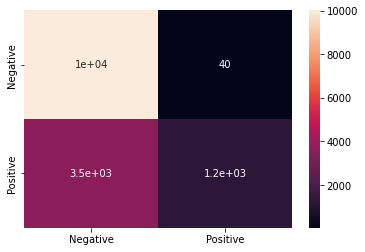

In [38]:
cm = confusion_matrix(test_labels, pred2)
sns.heatmap(cm, annot = True, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])